
Gitt bevegelses ligningen for en pendel gitt ved
\begin{equation}
\frac{d^2\theta}{dt^2}+\frac{g}{l}\sin\theta+q\frac{d\theta}{dt}=\frac{F_{D}}{ml}\sin(\omega_Dt)
\end{equation}
som forenkles med antagelsen $\sin\theta\approx\theta$ og da gir
\begin{equation}
\frac{d^2\theta}{dt^2}+\frac{g}{l}\theta+q\frac{d\theta}{dt}=\frac{F_{D}}{ml}\sin(\omega_Dt)
\end{equation}
For å få videre nytte av funksjonen må differensial likningen løses, og vi benytter oss da av Runge-Kutta metoden. Denne metoden krever første ordens differensial likninger så jeg omformer til
\begin{equation}
\dot{x} = v
\end{equation}
\begin{equation}
\dot{v} =\frac{F_{D}}{ml}\sin(\omega_Dt)-\frac{g}{l}\theta-qv
\end{equation}

In [1]:
#Nødvendige python pakker
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

#Initialverdier
l = 1.0    #Lengde av pendel
g = 9.8    #Gravitasjons konstant
θ_0 = 0.2  #Startsvinkel
ω_0 = 0    #Starts vinkelfart
q = 1      #Friksjonsparameter
ω_D = 3.13 #Drivkrafts vinkelfrekvens
F_D = 0.2 #Drivkraft



In [9]:
#Funksjoner 

def j(t_,theta_,v_):
    return v_  #Funksjonen x' = v


def f(t_,theta_,v_):
    return F_D*np.sin(ω_D*t_)-q*v_-(g/l)*theta_ #Funksjonen v'

def rk4(dt,t_n,t_0):

    h = dt  #Gir oss antall tidssteg
    n = int(1/h)
    theta = np.zeros(n)  #Tomt array for theta
    omega = np.zeros(n)  #Tomt array for omega
    t = np.linspace(t_0,t_n,n) #Tids array
    theta[0] = 0.2  #Setter starstverdien inn i theta
    omega[0] = 0    #Setter starstverdien inn i omega
        
    for i in range(0, n-1):  #Utfører Runge-Kutta metoden av fjerde orden
        x_1 = h*j(t[i],theta[i],omega[i])
        v_1 = h*f(t[i],theta[i],omega[i])
        x_2 = h*j(t[i]+h/2,theta[i]+(x_1)/2,omega[i]+(v_1)/2)
        v_2 = h*f(t[i]+h/2,theta[i]+(x_1)/2,omega[i]+(v_1)/2)
        x_3 = h*j(t[i]+h/2,theta[i]+(x_2)/2,omega[i]+(v_2)/2)
        v_3 = h*f(t[i]+h/2,theta[i]+(x_2)/2,omega[i]+(v_2)/2)
        x_4 = h*j(t[i]+h,theta[i]+x_3,omega[i]+v_3)
        v_4 = h*f(t[i]+h,theta[i]+x_3,omega[i]+v_3)
        x = theta[i]+(x_1)/6+(x_2)/3+(x_3)/3+(x_4)/6 
        v = omega[i]+(v_1)/6+(v_2)/3+(v_3)/3+(v_4)/6
        
        theta[i+1] = x
        omega[i+1] = v 
    return theta, omega, t  #Returnerer theta, omega og tids arrayet

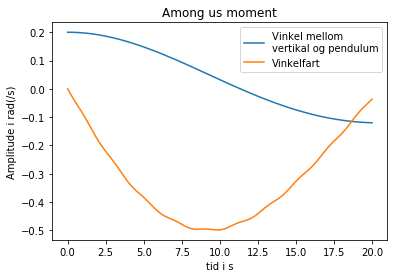

In [16]:
#a)

#Betingelser
dt = 0.01

theta, omega, t = rk4(dt,20,0)

plt.plot(t,theta, label = "Vinkel mellom\nvertikal og pendulum")
plt.plot(t,omega, label = "Vinkelfart")
plt.xlabel("tid i s")
plt.ylabel("Amplitude i rad(/s)")
plt.title("Among us moment")
plt.legend()
plt.show()


In [ ]:
ω_D = 3.13
theta1, omega1, t = rk4(dt,20,0)
ω_D = 2.13
theta2, omega2, t = rk4(dt,20,0)
ω_D = 1.13
theta3, omega3, t = rk4(dt,20,0)
ω_D = 5.13
theta4, omega4, t = rk4(dt,20,0)
ω_D = 0
theta5, omega5, t = rk4(dt,20,0)

plt.subplot(2,3,1)
plt.subplot(t,theta1, label = "Vinkel mellom\nvertikal og pendulum")
plt.subplot(2,3,2)
plt.subplot(t,theta2, label = "Vinkel mellom\nvertikal og pendulum")
plt.subplot(2,3,3)
plt.subplot(t,theta3, label = "Vinkel mellom\nvertikal og pendulum")
plt.subplot(2,3,4)
plt.subplot(t,theta4, label = "Vinkel mellom\nvertikal og pendulum")
plt.subplot(2,3,5)
plt.subplot(t,theta5, label = "Vinkel mellom\nvertikal og pendulum")
plt.xlabel("tid i s")
plt.ylabel("Amplitude i rad(/s)")
plt.title("Among us moment")
plt.legend()
plt.show()


In [ ]:
ω_D = 3.13
q = 2
theta1, omega1, t = rk4(dt,20,0)
q = 3
theta2, omega2, t = rk4(dt,20,0)
q = 0.5
theta3, omega3, t = rk4(dt,20,0)
q = 0.25
theta4, omega4, t = rk4(dt,20,0)
q = 0
theta5, omega5, t = rk4(dt,20,0)

plt.subplot(2,3,1)
plt.subplot(t,theta1, label = "Vinkel mellom\nvertikal og pendulum")
plt.subplot(2,3,2)
plt.subplot(t,theta2, label = "Vinkel mellom\nvertikal og pendulum")
plt.subplot(2,3,3)
plt.subplot(t,theta3, label = "Vinkel mellom\nvertikal og pendulum")
plt.subplot(2,3,4)
plt.subplot(t,theta4, label = "Vinkel mellom\nvertikal og pendulum")
plt.subplot(2,3,5)
plt.subplot(t,theta5, label = "Vinkel mellom\nvertikal og pendulum")
plt.xlabel("tid i s")
plt.ylabel("Amplitude i rad(/s)")
plt.title("Among us moment")
plt.legend()
plt.show()
